## PHD Project:  Analysis of Bank Grading and Grievances Data
### Input Data 
#### 2 tables are given
-  Grievence Data
-  Bank Grade

## PHD Project:  Analysis of Bank Grading and Grievances Data
### Input Data 
#### 2 tables are given
-  Grievence Data
-  Bank Grade

### Environment

In [1]:
import os
os.chdir('/Users/bsriram/Downloads/datasci/phd')

In [2]:
# Pandas is used for data manipulation
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [4]:
# Train
trainData = pd.read_csv('GrievancesData_Train.csv', header=0)
trainGrade = pd.read_csv('Train.csv', header=0)


In [5]:
testData = pd.read_csv('GrievancesData_Test.csv', header=0)
testGrade = pd.read_csv('Test.csv', header=0)

## Approach
> It wil be a 3 part approach:
   We will make preliminary study of the tables and based on observations, we will take appropriate in-depth analysus 

- Part A - Preliminary examination

- Part B - Feature Exploration

- Part C - Reduce the rows to examine (via elimination)

- Part D - Analyze GrievenceDescription using Text analytics

- Part E - Build/Tune/Evaluate models

# Part A - Preliminary Study
## Let us understand the data 

## A.1. BankGrade Table

In [6]:
# Dimensions of the bank-grade table
print('The shape of train grade table is:', trainGrade.shape)
print('The shape of test grade table is:', testGrade.shape)

The shape of train grade table is: (86, 2)
The shape of test grade table is: (22, 2)


In [7]:
trainGrade.describe()

,BankID,BankGrade
count,86,86
unique,86,3
top,Bank5386,satisfactory
freq,1,54


In [8]:
testGrade.describe()

,BankGrade
count,22.000000
mean,1.954545
std,0.485727
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


#### NAs?

In [9]:
print("Train: ", trainGrade.isnull().sum(), "Test: ", testGrade.isnull().sum())

Train:  BankID       0
BankGrade    0
dtype: int64 Test:  BankID       0
BankGrade    0
dtype: int64


In [10]:
print("Train: ", trainGrade.isna().sum(), "Test: ", testGrade.isna().sum())

Train:  BankID       0
BankGrade    0
dtype: int64 Test:  BankID       0
BankGrade    0
dtype: int64


#### No NAs in bankGradeTable (both train/test)

### Any duplicates in BankID (since this 'appears' to be a primary key)

In [11]:
trainGrade.BankID.duplicated().describe()

count        86
unique        1
top       False
freq         86
Name: BankID, dtype: object

In [12]:
testGrade.BankID.duplicated().describe()

count        22
unique        1
top       False
freq         22
Name: BankID, dtype: object

#### No Duplicate BankID in either of train/test

In [13]:
trainGrade.head(3)

,BankID,BankGrade
0,Bank5298,satisfactory
1,Bank5421,deficient
2,Bank5326,satisfactory


In [14]:
testGrade.head(3)

,BankID,BankGrade
0,Bank5334,2
1,Bank5278,2
2,Bank5372,2


#### As Expected, just one column in Test Data. We need to predict the Grade for these bankId's

In [15]:
trainGrade.groupby(trainGrade.BankGrade).count()

,BankID
BankGrade,
deficient,18
outstanding,14
satisfactory,54


### Bank-Grade Gradewise (best and the worst)

In [19]:
#topGradedBanks = bankGrades[bankGrades.loc[['BankGrade']]]
topGradedBanks = trainGrade.loc[trainGrade['BankGrade'] == 'outstanding']
topGradedBanks


,BankID,BankGrade
3,Bank5432,outstanding
13,Bank5350,outstanding
17,Bank5242,outstanding
20,Bank5408,outstanding
31,Bank5386,outstanding
37,Bank5261,outstanding
42,Bank5380,outstanding
51,Bank5279,outstanding
57,Bank5313,outstanding
60,Bank5459,outstanding


In [20]:
#topGradedBanks = bankGrades[bankGrades.loc[['BankGrade']]]
trainGrade.groupby(trainGrade.BankGrade).size()

BankGrade
deficient       18
outstanding     14
satisfactory    54
dtype: int64

In [21]:
import seaborn as sns
sns.plot = trainGrade['BankGrade'].value_counts().plot(kind='bar')

### Bank-Grade Observations:
-  Bank Grade is just a 2 column table, as expected and it just has grade given for a bank
-  Most banks graded as **satisfactory**
-  We can see that banks with outstanding are in slight minority
-  No NAs are found, so no imputation is needed. Data is Clean
-  No Duplicated bankID in the table. This ia a good sign, as we can use the table without cleanup measures at the moment

### Next? 
We need to look at the next (grievences Data) to see if we can draw some correlations!

## A.2. Grievnces Table

In [22]:
# Dimensions of the grievences train
print('The shape of grievence table is:', trainData.shape)

The shape of grievence table is: (53680, 10)


In [23]:
# Dimensions of the grievences test
print('The shape of grievence table is:', testData.shape)

The shape of grievence table is: (27954, 10)


In [24]:
#train column names?
trainData.columns

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'GrievanceDescription', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'DateOfResolution'],
      dtype='object')

In [25]:
#test column names?
testData.columns

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'GrievanceDescription', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'DateOfResolution'],
      dtype='object')

####     It is important that train/test have same set of features (columns)
- Lets check

In [26]:
#identical column names?
if (testData.columns.all() == trainData.columns.all()):
    print("Train/Test data have same features")

Train/Test data have same features


### Observation:
  -  Train: Over 53k rows of grievences with 10 columns 
  -  Test: Above 28k rows of grievences with 10 columns
  -  It is verified that train/test have <b>identical</b> set of features (columns)

#### What are the column types? (numerical or Categorical)

In [27]:
grievenceData.select_dtypes(exclude=['int', 'float']).columns

NameError: name 'grievenceData' is not defined

####  Observations
- There are NO numerical columns

In [ ]:
trainData.describe()

In [ ]:
testData.describe()

In [ ]:
trainData.isna().sum()

In [ ]:
trainData.isnull().sum()

In [ ]:
testData.isnull().sum()

In [ ]:
testData.isnull().sum()

## Very few (compared to total observations) NA's in both train/Test data.
#### We can either choose to mode impute or drop, depending on train/test mode values

In [ ]:
#impute using mode (1st iteration)
stateMode = trainData.State.describe().top
print('Mode of (train)State column is ', stateMode)
#test: impute using mode (1st iteration)
stateMode = testData.State.describe().top
print('Mode of (test)State column is ', stateMode)

## Luckily, both  both train/Test data have same mode (state9)
#### We can  mode impute , safely

In [ ]:
trainData.State.fillna(stateMode,inplace=True)
testData.State.fillna(stateMode,inplace=True)
print("NAs in Train, test, after impute: Train\n", trainData.isna().sum(), "test/n", testData.isna().sum())

#### Train Observations (from basic exploration)
- There are **86** Banks in Train data and 22 banks in Test

- **Bank5286** has most grievences (5623 obs)

- NA count is only present in 'State' and is <b> very insignificant </b> compared to the observation set ( < 0.2%)

- **State9** is most frequent state (5110 obs)

- Most Frequent Grievence category is **Loan Servicing** (8465 obs)

- Credit card is most **disputed** line of Business

- ~42k grievences are **not** disputed (around **21%** are disputed)

- Looking at Fields : 'DateOfGrievance' and DateOfResolution, we are better off deriving another feature such as 'ResolutionTime' as the date per se may not have much interpretability whereas ResolutionTime tells us something about the Bank. Hoe efficient/customer oriented, etc
                                  

In [ ]:
trainData.groupby(trainData.BankID).size().nlargest(45)

In [ ]:
testData.groupby(testData.BankID).size().nlargest(12)

#### Test Observations (from basic exploration)
- There are **86** Banks in Train data and 22 banks in Test

- **Bank5286** has most grievences (5623 obs)

- NA count is only present in 'State' and is <b> very insignificant </b> compared to the observation set ( < 0.2%)

- **State9** is most frequent state (5110 obs)

- Most Frequent Grievence category is **Loan Servicing** (8465 obs)

- Credit card is most **disputed** line of Business

- ~42k grievences are **not** disputed (around **21%** are disputed)

### Actions we can do:
- Looking at Features : 'DateOfGrievance' and DateOfResolution, we are better off deriving another feature such as 'ResolutionTime' as the date per se may not have much interpretability whereas ResolutionTime tells us something about the Bank. Hoe efficient/customer oriented, etc
                                  

### Add 'ResolutionTime' column

In [ ]:
# A handy function..
from datetime import date, datetime
def getResolutionTime(row):
     rpt = row['DateOfGrievance']
     rsp = row['DateOfResolution']
     #print(rpt, rsp)
     y,m,d = [int(i) for i in rpt.split('-')]
     st = date(y,m,d)
     y,m,d = [int(i) for i in rsp.split('-')]
     end = date(y,m,d)
     return int(pd.to_numeric((end-st).days))

In [ ]:
trainData['ResolutionTime'] = trainData.apply(getResolutionTime, axis=1)
print(trainData.describe())
print(trainData.shape)

In [ ]:
testData['ResolutionTime'] = testData.apply(getResolutionTime, axis=1)
print(testData.describe())
print(testData.shape)

In [ ]:
trainData.ResolutionTime.plot.box()

In [ ]:
testData.ResolutionTime.plot.box()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
tr_x_axis = trainData.ResolutionTime.as_matrix().reshape((53680,1))

test_x_axis = trainData.ResolutionTime.as_matrix().reshape((53680,1))

plt.show()
plt.plot(tr_x_axis, norm.pdf(tr_x_axis,0,2))
plt.show()

plt.plot(test_x_axis, norm.pdf(test_x_axis,0,4))
plt.show()

### Resouition time for Both train and test are not very different, but Test data seems to have fewer outliers
### Mean (train < test)
### Std ( train> test)
### Since there aren't significant differences, we can move on...

In [ ]:
trainData[trainData.ResolutionTime >100].shape

In [ ]:
testData[testData.ResolutionTime >100].shape

In [ ]:
for feature in trainData.columns:
    print(trainData[feature].describe())
    print('=========')

In [ ]:
for feature in testData.columns:
    print(testData[feature].describe())
    print('=========')

In [ ]:
for feature in featureList:
    print(trainData.groupby(feature).size().nlargest(80))
    print('=========')

In [ ]:
for feature in featureList:
    print(testData.groupby(feature).size().nlargest(80))
    print('=========')

In [ ]:
featureList = ['BankID', 'State', 'Grievance_Category', 'LineOfBusiness', 'Disputed',  'ResolutionTime']
import matplotlib.pyplot as plt
def plotfeatures(df):
 for feature in featureList:
    print('Distribution of ', feature)
    featureCount = df[feature].value_counts()
    print(sum(featureCount.values.tolist()[0:40]))
    
    sns.barplot(featureCount.index, featureCount.values, alpha=0.9)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()


In [ ]:
print("Train Data feature plots")
plotfeatures(trainData)

In [ ]:
print("Test Data feature plots")
plotfeatures(testData)

In [ ]:
sum([8231, 4570, 3747, 3619, 2344, 2168, 2141, 2090, 1850, 1738, 1685, 1620, 1365, 1363, 1272, 1271, 962, 806, 706, 676])

### Story thusfar.. Tables are loaded and basic exploration of data is done
- Feature Stats

- Outliers -- not many, as most are categorical fields with 

- Feature Additions
Added Resolution time, to make sense of how quickly banks are resolving complaints 

- Interesting observations: Mean Time to resolve (MTTR) : 11 days

### What next?
#### What do we make out of the tables? Are they related? Etc

### Story So far.. Tables are loaded and basic exploration of data is done
- Feature Stats
- Outliers

- Feature Additions
Added Resolution time, to make sense of how quickly banks are resolving complaints 
- Interesting observations:
Mean Time to resolve (MTTR) : 11 days

### Problem Statement :
Note : You are required to develop unique words/phrases for identification of a grievance as UFDP or otherwise by using key words of regulations and/or the text forming part of Grievance description through the use of text mining techniques. You can refer to the above cited link for definition of UFDP as per act and you may explore domain further to dig into the details.
Exploration of  domain and also usage of Grievance Description column to identify the grievance category as UFDP or otherwise may help you not only to understand the problem well but also to understand some of the required domain based feature extraction  in solving the problem.

Based on above, we need to focus on BankGrade (dependent) and its correnated columnts Grievence Description
Before jumping into the text analytics on GreivenceDescription, we need to look for any clues.
looking at the other fields and correlation to BankGrade is important, to gain more guidence


In [ ]:
print("GrievanceData Columns", grievenceData.columns)
print("Bank Grade Table Columns", bankGradeTable.columns)

Looks Like 'BankID' is common column.. But names can be same, even if they refer to different entities...
We can look at unique set of BanKID list from *both* tables and see if they opverlap/match?

### Are there any disjoint set of banks among the tables? 
##### compare the unique list (sorted) of BankIDs from both tables

In [ ]:
grvBankList = grievenceData.BankID.unique().sort()
gradedBankList = bankGradeTable.BankID.unique().sort()
if grvBankList == gradedBankList:
    print('Both Tables have same bankIDs')


#### Further Exploration can be in 2 independent directions, based on the possibiliies such as:
##### No correlation between 2 tables.
##### There may be a correlation between how a bank is graded and how it performed in handling consumer grievances (among other things, ofcourse, such as Business Strategy, Vision, etc) Unfortunately, we do not have ANY other data to look at!!!

Based on Above reasoning, we will first check to see if any Correlation can be found among the tables
How ? 
Ask many more questions and find the answers hidden
A close look at features of the Grievances and arrange them in decreasing order of importance, based on some reasoning

#### Combine tables
-  Before proceeding any correlation, for the sake of avoiding repetitive join/merge , lets have a single table by merging both the tables on BankID


### Which Features to look at? 

The following seem to be directly related to BankGrade
> A way to Corroborate is to ask relevant QUESTIONS!!!!

- Disputed
>> How is Disputed (=yes) are in poor Grade?

- Grievance_Category
- ResolutionComments

In [30]:
allData = trainData.merge(trainGrade)
allData.shape

(53680, 11)

In [31]:
print(allData.columns)
print(allData.describe())

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'GrievanceDescription', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'DateOfResolution', 'BankGrade'],
      dtype='object')
       GrievanceID    BankID   State DateOfGrievance  \
count        53680     53680   53559           53680   
unique       53680        86      59            1222   
top      GID435431  Bank5286  State9      2014-01-19   
freq             1      5623    8110             172   

                              Grievance_Category  \
count                                      53680   
unique                                        67   
top     Loan servicing, payments, escrow account   
freq                                        8455   

                                     GrievanceDescription LineOfBusiness  \
count                                               53680          53680   
unique                                              46662              4   
to

###  For ease of data dissection , lets partition 'allData' by 'BankGrade'

In [32]:
topGr = allData.loc[allData.BankGrade == 'outstanding']
medGr = allData.loc[allData.BankGrade == 'satisfactory']
lowGr = allData.loc[allData.BankGrade == 'deficient']

In [50]:
b5439 = allData.loc[allData.BankID=='Bank5439']
b5439.groupby(b5439.Grievance_Category).count()
lowGr.groupby(allData.Grievance_Category).count()
b5439.groupby(allData.Grievance_Category).count()

#b5439.groupby(b5439.ResolutionComments).c.count(ount()

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution,BankGrade
Grievance_Category,,,,,,,,,,,
"Application, originator, mortgage broker",10,10,10,10,10,10,10,10,10,10,10
Closing on a mortgage,1,1,1,1,1,1,1,1,1,1,1
Credit decision / Underwriting,1,1,1,1,1,1,1,1,1,1,1
Incorrect information on your report,1,1,1,1,1,1,1,1,1,1,1
"Loan modification,collection,foreclosure",7,7,7,7,7,7,7,7,7,7,7
"Loan servicing, payments, escrow account",9,9,9,9,9,9,9,9,9,9,9
Managing the loan or lease,16,16,16,16,16,16,16,16,16,16,16
Problems when you are unable to pay,12,12,12,12,12,12,12,12,12,12,12
Settlement process and costs,2,2,2,2,2,2,2,2,2,2,2


In [373]:
topGr.GrievanceDescription.describe()


count                                                  4495
unique                                                 4000
top        I have a {$25000.00} credit card line with Re...
freq                                                      3
Name: GrievanceDescription, dtype: object

In [58]:
from nltk import word_tokenize
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')    # get english stop words

def clean(doc):

    # first tokenize your document to a list of words
    words = word_tokenize(document)
    #print(words)

    # the remove all stop words
    content = [w for w in words if w.lower() not in english_stopwords]
    return(content)

### lemmatize

### How much data in each class (of table)?

In [374]:
print(topGr.shape[0])
print(medGr.shape[0])
print(lowGr.shape[0])

4495
34881
14304


# Part B - In-depth Feature exploration 
> As per plan, we are trying to find any correlation between a bank's <font color='green'><b>grade - Grievance data </font></b>
> In subsequent sub-sections, we will dissect each feature and try to learn how each category of banks fared
> Based on exploration, We will order Features by decreasing importance

In [375]:
FeatureRank= dict.fromkeys(topGr.columns)
FeatureRank

{'GrievanceID': None,
 'BankID': None,
 'State': None,
 'DateOfGrievance': None,
 'Grievance_Category': None,
 'GrievanceDescription': None,
 'LineOfBusiness': None,
 'ResolutionComments': None,
 'Disputed': None,
 'DateOfResolution': None,
 'ResolutionTime': None,
 'weekday': None,
 'BankGrade': None}

In [376]:
def analyseFeatures(df):
    features = ['BankID', 'State',
       'Grievance_Category', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'ResolutionTime']
    print("Feature", " - LevelCount - ", "sum(top 30)")
    print('----------------------------------')
    for feature in features:
        levels = len(df[feature].value_counts())
        if levels > 30:
           print(feature, "--", levels, sum(df[feature].value_counts()[0:30]))
        else:
            print(feature, "--", levels, 'all')
analyseFeatures(allData)

Feature  - LevelCount -  sum(top 30)
----------------------------------
BankID -- 86 43107
State -- 59 49818
Grievance_Category -- 67 50607
LineOfBusiness -- 4 all
ResolutionComments -- 4 all
Disputed -- 2 all
ResolutionTime -- 117 52580


### Except for BankID, 90% of data is covered by top 30 levels in respective features
Why is this important?
It helps in 
focussing on what matters most. 
Dimensionality Reduction
However, this applies to more to conventional ML . In case of DL, this approach is not good, as DL is data hungry

### B.1 Feature Analysis:  Disputed

In [377]:
def findDisputed(df):
     return round(100*df.loc[df['Disputed'] =='Yes'].shape[0]/df.shape[0],2)

bankSummary=pd.DataFrame(columns=allData.columns)
bankSummary.drop(['GrievanceID',  'DateOfGrievance'], axis=1)
print(bankSummary.shape)
print(bankSummary.describe())

print(findDisputed(topGr), "% of grievances are disputed for top graded banks")
print(findDisputed(medGr), "% of grievances are disputed for medium graded banks")
print(findDisputed(lowGr), "% of grievances are disputed for low graded banks")

(0, 13)
        GrievanceID  BankID  State  DateOfGrievance  Grievance_Category  \
count             0       0      0                0                   0   
unique            0       0      0                0                   0   

        GrievanceDescription  LineOfBusiness  ResolutionComments  Disputed  \
count                      0               0                   0         0   
unique                     0               0                   0         0   

        DateOfResolution  ResolutionTime  weekday  BankGrade  
count                  0               0        0          0  
unique                 0               0        0          0  
14.77 % of grievances are disputed for top graded banks
22.04 % of grievances are disputed for medium graded banks
23.99 % of grievances are disputed for low graded banks


Text(0.5,1,'Outstanding')

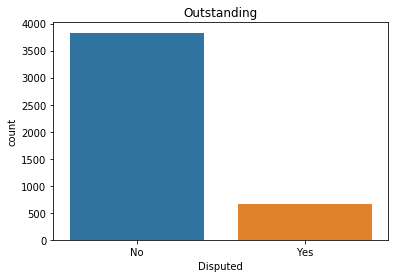

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

disp = sns.countplot(topGr.Disputed)
disp.set_title("Outstanding")

Text(0.5,1,'Satisfactory')

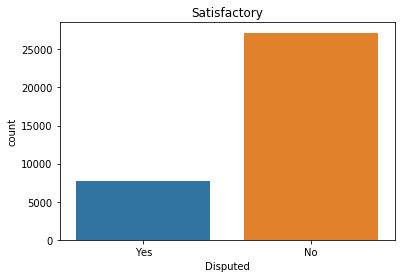

In [379]:
g = sns.countplot(medGr.Disputed)
g.set_title("Satisfactory")

Text(0.5,1,'Deficient')

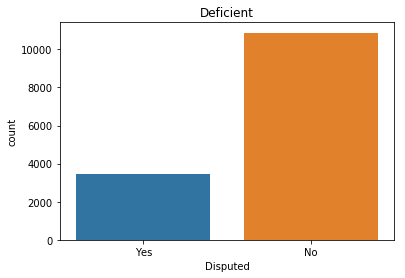

In [380]:
g = sns.countplot(lowGr.Disputed)
g.set_title("Deficient")

#### Conclusions of Feature Analysis: Disputed
> As seen above, there seems to be a strong correlation of <b> disputed </b> with the Grade for <b>outstanding </b> banks and there is a week distinction among <b> satisfactory </b> and <b>deficient</b> graded banks

We can form a relation as :
  dispOut (0.14) << dispSat <0.22> < dispDef <0.24>
  
> <b>Disputed is an important Factor for predicting a grade </b>
> Importance Rank-1

In [381]:
#assign the rank
FeatureRank['Disputed'] = 1
FeatureRank

{'GrievanceID': None,
 'BankID': None,
 'State': None,
 'DateOfGrievance': None,
 'Grievance_Category': None,
 'GrievanceDescription': None,
 'LineOfBusiness': None,
 'ResolutionComments': None,
 'Disputed': 1,
 'DateOfResolution': None,
 'ResolutionTime': None,
 'weekday': None,
 'BankGrade': None}

In [382]:
# Which Banks have most grievences in which State?
#


### B.2 Feature Analysis:  LineOfBusiness

In [383]:
topGr.groupby(topGr.LineOfBusiness).count()

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,ResolutionComments,Disputed,DateOfResolution,ResolutionTime,weekday,BankGrade
LineOfBusiness,,,,,,,,,,,,
Consumer Loan,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230
Credit card,88,88,88,88,88,88,88,88,88,88,88,88
Mortgage,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
Student loan,506,506,506,506,506,506,506,506,506,506,506,506


Text(0.5,1,'Outstanding')

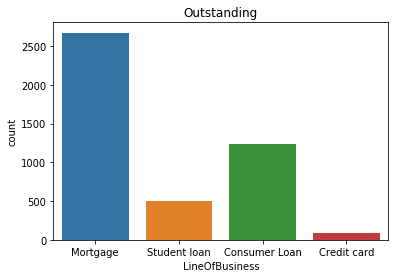

In [384]:
topLob = sns.countplot(topGr.LineOfBusiness)
topLob.set_title("Outstanding")

Text(0.5,1,'Satisfactory')

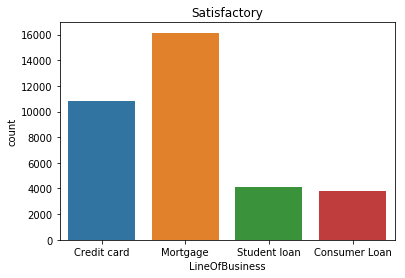

In [385]:
g = sns.countplot(medGr.LineOfBusiness)
g.set_title("Satisfactory")

Text(0.5,1,'Deficient')

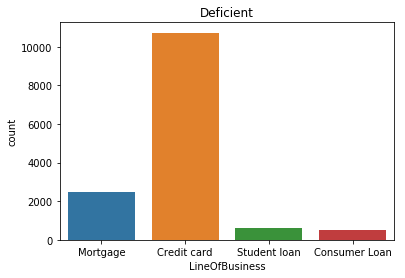

In [386]:
g = sns.countplot(lowGr.LineOfBusiness)
g.set_title("Deficient")

#### Conclusions of Feature Analysis: Line of Business
##### Visual plots clearly show some interesting and useful factors:
> Outstanding banks <b>do not deal</b> with <b>Credit Cards</b> much but more on 'Mortgage' (secured asset?) loans.
> Deficient banks deal <b>mostly with Credit Cards </b> and less on 'Mortgage' and consumer loans.
> We can also see distinction between *satisfactory* and *deficient* in this feature: Mortgae.. Some tie breaker for us :-)

 <b>Line of Business is an important Factor for predicting a grade </b>
 > Importance Rank-2

In [387]:
#assign the rank
FeatureRank['LineOfBusiness'] = 2
FeatureRank

{'GrievanceID': None,
 'BankID': None,
 'State': None,
 'DateOfGrievance': None,
 'Grievance_Category': None,
 'GrievanceDescription': None,
 'LineOfBusiness': 2,
 'ResolutionComments': None,
 'Disputed': 1,
 'DateOfResolution': None,
 'ResolutionTime': None,
 'weekday': None,
 'BankGrade': None}

### B.3 Feature Analysis:  Grievance_Category

Text(0.5,1,'Outstanding')

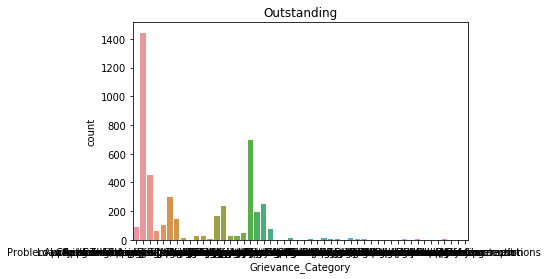

In [388]:
g = sns.countplot(topGr.Grievance_Category)
g.set_title("Outstanding")

Text(0.5,1,'Satisfactory')

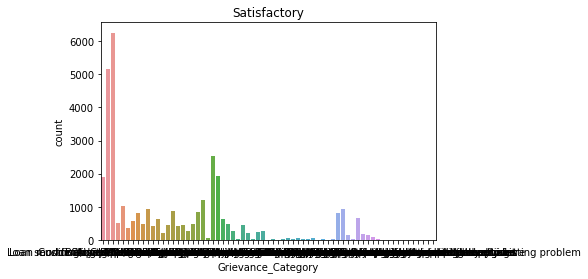

In [389]:
g = sns.countplot(medGr.Grievance_Category)
g.set_title("Satisfactory")

Text(0.5,1,'Deficient')

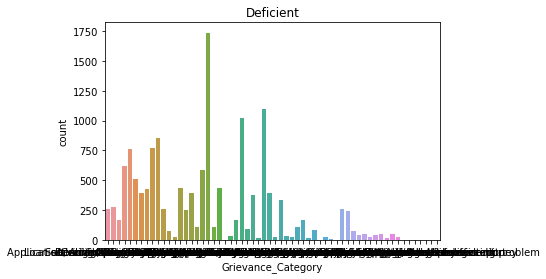

In [390]:
g = sns.countplot(lowGr.Grievance_Category)
g.set_title("Deficient")

#### Obeservations of Feature Analysis: Grievence Category
> Visuals do not give much but still we can infer that 'Outstanding' banks have 'fewer' categories of complaints Vs others
> more work to be done to check which Grievance Category occurs in each class

In [391]:
(topGr.Grievance_Category.value_counts().nlargest(20))

Loan servicing, payments, escrow account                       1443
Managing the loan or lease                                      696
Loan modification,collection,foreclosure                        455
Trouble during payment process                                  296
Problems when you are unable to pay                             250
Dealing with my lender or servicer                              234
Taking out the loan or lease                                    194
Can't repay my loan                                             167
Struggling to pay mortgage                                      148
Application, originator, mortgage broker                        107
Settlement process and costs                                     91
Shopping for a loan or lease                                     73
Credit decision / Underwriting                                   60
Dealing with your lender or servicer                             48
Struggling to repay your loan                   

In [392]:
(medGr.Grievance_Category.value_counts().nlargest(10))

Loan servicing, payments, escrow account    6251
Loan modification,collection,foreclosure    5164
Dealing with my lender or servicer          2547
Managing the loan or lease                  1931
Billing disputes                            1894
Application, originator, mortgage broker    1190
Other                                       1038
Trouble during payment process               937
Identity theft / Fraud / Embezzlement        924
Settlement process and costs                 873
Name: Grievance_Category, dtype: int64

In [393]:
(lowGr.Grievance_Category.value_counts().nlargest(10))

Billing disputes                            1736
Other                                       1094
Identity theft / Fraud / Embezzlement       1021
Loan modification,collection,foreclosure     850
Closing/Cancelling account                   768
Loan servicing, payments, escrow account     761
Rewards                                      622
Customer service / Customer relations        589
Advertising and marketing                    512
Delinquent account                           434
Name: Grievance_Category, dtype: int64

#### Observations on Grievance_Category:
> There is a clear difference in distribution of Complaint types
Ex: Billing disputes is high in 'Deficient' Category whereas it is in bottom of top 20 in 'Outstanding' Banks

> more work needs to be done (selecting exclusive set of grievence_categories in 'Deficient' and 'Satisfactory' banks

In [394]:
print('Count unique of grievance types(classwise) :')
print("                                            Deficient:", len(lowGr.Grievance_Category.unique()))
print("                                            Satisfactory:", len(medGr.Grievance_Category.unique()))
print("                                            Outstanding:", len(topGr.Grievance_Category.unique()))

Count unique of grievance types(classwise) :
                                            Deficient: 60
                                            Satisfactory: 67
                                            Outstanding: 50


#### Conclusions of Feature Analysis: Grievence Category
  
> <b>Grievance_Category seems to be a reasonably important Factor for predicting a grade, with careful preprocessing</b>

> An approach is to remove common top 'n' types from all 3 categories. This reduces the dimensionality and collinearity for ML . The idea is to create 'signature' set of grievences for each class, helping in predictive power of this feature towards Grade. This will be an iterative approach

> TODO: Find <b>'Signature set</b> of grievences for each class

In [395]:
#assign the rank
FeatureRank['Grievance_Category'] = 5
FeatureRank

{'GrievanceID': None,
 'BankID': None,
 'State': None,
 'DateOfGrievance': None,
 'Grievance_Category': 5,
 'GrievanceDescription': None,
 'LineOfBusiness': 2,
 'ResolutionComments': None,
 'Disputed': 1,
 'DateOfResolution': None,
 'ResolutionTime': None,
 'weekday': None,
 'BankGrade': None}

###  B.4 Feature Analysis: GrievanceDescription

In [396]:
topGr.GrievanceDescription.describe()

count                                                  4495
unique                                                 4000
top        I have a {$25000.00} credit card line with Re...
freq                                                      3
Name: GrievanceDescription, dtype: object

In [397]:
medGr.GrievanceDescription.describe()

count                                                 34881
unique                                                30281
top        This account is reported in to XXXX, XXXX and...
freq                                                      6
Name: GrievanceDescription, dtype: object

In [398]:
lowGr.GrievanceDescription.describe()

count                                                 14304
unique                                                13498
top        This company is still reporting a account on ...
freq                                                      4
Name: GrievanceDescription, dtype: object

#### Conclusions of Feature Analysis: Grievence Description
  
> <b>Grievance_Description is most complex as it involves NLP and text analytics
> Approach will be do preprocessing, stop-word removal and sentiment analysis, to see if any keywords can be drawn which are specific to the Grade

> TODO: A lot of text-preprocessing and Find <b>'Signature set of keywords</b> of grievences for each class

> Among all the features, this will be the final/least preferred feature

> Build a model without this feature and add this to improve accuracy on Train/Test

> The above ranking on feature set is based on preliminary analysis and further exploration

### B.6 Feature Analysis: ResolutionComments

In [399]:
print(topGr.shape, topGr.ResolutionComments.describe())
print(medGr.shape, medGr.ResolutionComments.describe())
print(lowGr.shape, lowGr.ResolutionComments.describe())
print(topGr.ResolutionComments.value_counts())
print(medGr.ResolutionComments.value_counts())
print(lowGr.ResolutionComments.value_counts())

(4495, 13) count                        4495
unique                          4
top       Closed with explanation
freq                         4181
Name: ResolutionComments, dtype: object
(34881, 13) count                       34881
unique                          4
top       Closed with explanation
freq                        26943
Name: ResolutionComments, dtype: object
(14304, 13) count                       14304
unique                          4
top       Closed with explanation
freq                        10422
Name: ResolutionComments, dtype: object
Closed with explanation            4181
Closed with monetary relief         181
Closed with non-monetary relief     113
Closed                               20
Name: ResolutionComments, dtype: int64
Closed with explanation            26943
Closed with monetary relief         4155
Closed with non-monetary relief     3231
Closed                               552
Name: ResolutionComments, dtype: int64
Closed with explanation            

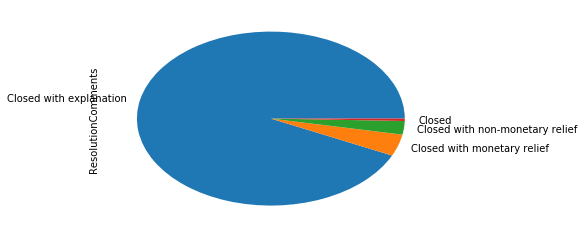

In [400]:
topGr.ResolutionComments.value_counts().plot(kind='pie')


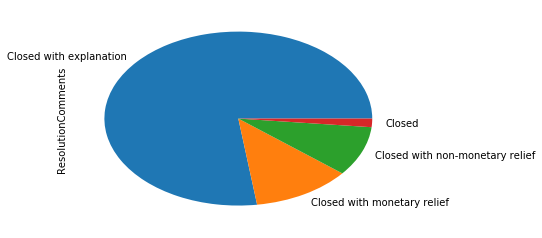

In [401]:
medGr.ResolutionComments.value_counts().plot(kind='pie')


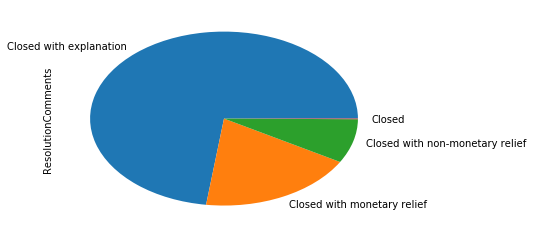

In [402]:
lowGr.ResolutionComments.value_counts().plot(kind='pie')

#### Conclusions of Feature Analysis: Resolution Comments
> Most Cases are closed with explanation in All classes
##### Monetary Relief 
> In case of Deficient graded banks, the fraction of *monetary relief* is higher than the other 2 classes
> The plots indicate thet Outstanding banks have far fewer Monetary Releif closures
##### Closed
> Outstanding Banks lead > Satisfactory > Deficient

This has good Grade correlation? 

### B.5 Important features for Grading of Banks
- GrievenceDescription
- Disputed
- ResolutionComments
- 

### B.5 Feature Analysis: State 

In [403]:
print("Outstanding banks State Data:\n", topGr.State.describe())
print("Satisfactory banks State Data:\n", topGr.State.describe())
print("Outstanding banks State Data:\n", topGr.State.describe())

Outstanding banks State Data:
 count       4495
unique        56
top       State9
freq         535
Name: State, dtype: object
Satisfactory banks State Data:
 count       4495
unique        56
top       State9
freq         535
Name: State, dtype: object
Outstanding banks State Data:
 count       4495
unique        56
top       State9
freq         535
Name: State, dtype: object


In [404]:
print("Outstanding banks State Data:\n", topGr.State.value_counts().nlargest(10))
print("Satisfactory banks State Data:\n", medGr.State.value_counts().nlargest(10))
print("Deficient banks State Data:\n", lowGr.State.value_counts().nlargest(10))

Outstanding banks State Data:
 State9     535
State14    406
State53    346
State16    247
State21    195
State40    182
State47    177
State43    177
State44    171
State56    157
Name: State, dtype: int64
Satisfactory banks State Data:
 State9     5458
State14    3056
State53    2350
State43    2252
State16    1562
State40    1390
State47    1359
State21    1309
State56    1188
State27    1170
Name: State, dtype: int64
Deficient banks State Data:
 State9     2238
State43    1318
State14    1108
State53     923
State47     605
State40     596
State21     586
State16     535
State56     505
State27     425
Name: State, dtype: int64


#### Which state has most Disputed?

In [405]:
allData.State.value_counts().describe()

count      59.000000
mean      909.830508
std      1386.495323
min         2.000000
25%       143.000000
50%       388.000000
75%      1271.500000
max      8231.000000
Name: State, dtype: float64

Distribution of Statewise Grievence counts


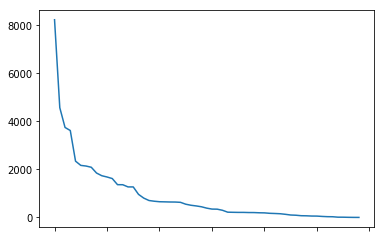

In [406]:
allData.State.value_counts().plot()
print("Distribution of Statewise Grievence counts")

90.36 % of Grievence Data is from 27 States


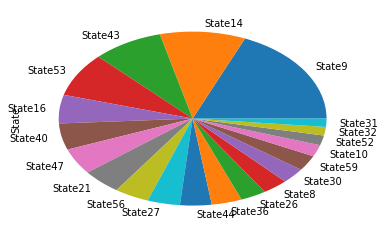

In [407]:
(allData.State.value_counts().nlargest(20)).plot(kind='pie')
top90pc = round(100*(allData.State.value_counts().nlargest(27)).sum()/allData.shape[0],2)
print(top90pc, "% of Grievence Data is from 27 States")


In [408]:
allData.State.value_counts()[26]

508

#### Conclusions of Feature Analysis: State
> State9 is most common the banks are operating

> State43 figures 2nd on 'Deficient' Graded banks where as it is 8th in Outstanding ..

> As seen above, there is no Obvious correlation but we need to add more factors (such as Grievence type/BankID ) to see if there is any pattern

> 'State' is not important independent factor. More study is needed before we conclude

In [409]:
#assign the rank
FeatureRank['State'] = 6
FeatureRank

{'GrievanceID': None,
 'BankID': None,
 'State': 6,
 'DateOfGrievance': None,
 'Grievance_Category': 5,
 'GrievanceDescription': None,
 'LineOfBusiness': 2,
 'ResolutionComments': None,
 'Disputed': 1,
 'DateOfResolution': None,
 'ResolutionTime': None,
 'weekday': None,
 'BankGrade': None}

In [410]:
#assign the rank
FeatureRank['ResolutionComments'] = 3
FeatureRank

{'GrievanceID': None,
 'BankID': None,
 'State': 6,
 'DateOfGrievance': None,
 'Grievance_Category': 5,
 'GrievanceDescription': None,
 'LineOfBusiness': 2,
 'ResolutionComments': 3,
 'Disputed': 1,
 'DateOfResolution': None,
 'ResolutionTime': None,
 'weekday': None,
 'BankGrade': None}

### B.7 Feature Analysis:  ResolutionTime

In [411]:
topGr.ResolutionTime.describe()

count    4495.000000
mean       15.305451
std         8.594453
min         2.000000
25%        11.000000
50%        11.000000
75%        18.000000
max       205.000000
Name: ResolutionTime, dtype: float64

In [412]:
medGr.ResolutionTime.describe()

count    34881.000000
mean        17.306815
std         10.752254
min          1.000000
25%         11.000000
50%         11.000000
75%         22.000000
max        554.000000
Name: ResolutionTime, dtype: float64

In [413]:
lowGr.ResolutionTime.describe()

count    14304.00000
mean        17.99189
std         12.92717
min          6.00000
25%         11.00000
50%         11.00000
75%         22.00000
max        629.00000
Name: ResolutionTime, dtype: float64

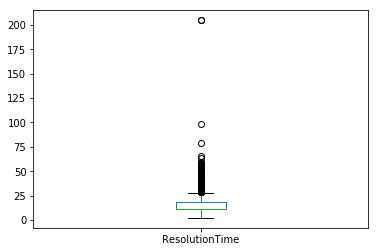

In [414]:
topGr.ResolutionTime.plot.box()

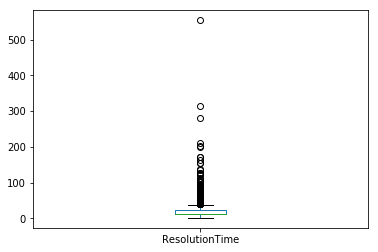

In [415]:
medGr.ResolutionTime.plot.box()

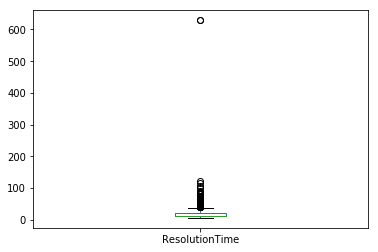

In [416]:
lowGr.ResolutionTime.plot.box()

In [417]:
for i in [topGr, medGr, lowGr]:
    print(pd.DataFrame(i.ResolutionTime.describe()).T)

                 count       mean       std  min   25%   50%   75%    max
ResolutionTime  4495.0  15.305451  8.594453  2.0  11.0  11.0  18.0  205.0
                  count       mean        std  min   25%   50%   75%    max
ResolutionTime  34881.0  17.306815  10.752254  1.0  11.0  11.0  22.0  554.0
                  count      mean       std  min   25%   50%   75%    max
ResolutionTime  14304.0  17.99189  12.92717  6.0  11.0  11.0  22.0  629.0


#### Conclusions of Feature Analysis: ResolutionTime
> 

> In case of Deficient graded banks, the data distribution(describe) shows  ordering
mean resolutionTime: outstanding < satisfactory < deficient
std resolutionTime: outstanding < satisfactory < deficient
This might need some more cleaning?

In [418]:
#assign the rank
FeatureRank['ResolutionTime'] = 4
FeatureRank

{'GrievanceID': None,
 'BankID': None,
 'State': 6,
 'DateOfGrievance': None,
 'Grievance_Category': 5,
 'GrievanceDescription': None,
 'LineOfBusiness': 2,
 'ResolutionComments': 3,
 'Disputed': 1,
 'DateOfResolution': None,
 'ResolutionTime': 4,
 'weekday': None,
 'BankGrade': None}

## B.8. A few business impacting insights:
<h5> 
BankId : Which bank has highest tickets in a State? Are these evenly spread? 
</h5>
<h5>
Is there a trend or seasonality in the Grievences?
</h5>
<h5>
State : Which State has most grievances?
</h5>
<h5>
Disputed : Disputed seems to have direct correlation with Grade, whete can A Bank improve?
</h5
<h5>
LineOfBusiness: Which Banks need to change their strategy, to improve Grading?
</h5>


In [419]:
allData.groupby([allData.State]).size()

State
State1        3
State10     962
State11     655
State12     480
State13     299
State14    4570
State15       6
State16    2344
State17      11
State18     191
State19     211
State2       33
State20     155
State21    2090
State22     552
State23     215
State24     345
State25     445
State26    1365
State27    1738
State28     195
State3       69
State30    1272
State31     676
State32     706
State33       2
State34     205
State35     102
State36    1620
State37      43
State38     165
State39     220
State4      508
State40    2168
State41     211
State42     650
State43    3747
State44    1685
State45     349
State46     644
State47    2141
State48      73
State49     173
State5       30
State50     642
State51      59
State52     806
State53    3619
State55     388
State56    1850
State57      12
State58      93
State59    1271
State6      204
State60     630
State61     131
State62      57
State8     1363
State9     8231
dtype: int64

In [420]:
allData[allData.DateOfGrievance > str(2014)].head(6)

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution,ResolutionTime,weekday,BankGrade
0,GID512411,Bank5279,State31,2016-01-19,Settlement process and costs,"Bank5279 Research dpt. \nXXXX XXXX XXXX XXXX,...",Mortgage,Closed with explanation,No,2016-01-30,11,SATURDAY,outstanding
1,GID512415,Bank5279,State53,2016-01-19,"Loan servicing, payments, escrow account",Our Mortgage was sold to Bank5279 in XXXX of ...,Mortgage,Closed with explanation,No,2016-01-30,11,SATURDAY,outstanding
2,GID515128,Bank5279,State9,2016-03-19,"Loan servicing, payments, escrow account",I was offered a trial modification by my serv...,Mortgage,Closed with explanation,No,2016-03-30,11,WEDNESDAY,outstanding
3,GID512466,Bank5279,State53,2016-01-19,"Loan servicing, payments, escrow account",Our Mortgage was sold to Bank5279 in XXXX of ...,Mortgage,Closed with explanation,No,2016-01-30,11,SATURDAY,outstanding
4,GID512489,Bank5279,State25,2016-01-20,"Loan servicing, payments, escrow account",My previous Mortgage Servicer sold my loan to...,Mortgage,Closed with explanation,No,2016-01-31,11,SUNDAY,outstanding
5,GID512637,Bank5279,State14,2016-01-23,"Loan servicing, payments, escrow account",XXXX XXXX XXXX transferred the servicing of m...,Mortgage,Closed with explanation,No,2016-02-03,11,WEDNESDAY,outstanding


## B.8 A closer look at 'timelines'

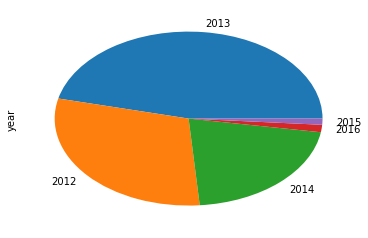

In [421]:
def findYear(row):
     rpt = row['DateOfGrievance']
     return rpt[0:4]

allData['year'] = allData.apply(findYear, axis=1)

allData.year.value_counts()
allData.year.value_counts().plot(kind='pie')


### There is a decreasing trend in number of Grievences
Reasons could be severl, such as:

a) Some Banksare going out of business due to regulatory issues?

b) All banks are improving ? 

<b> More data dissection is needed in time </b>

## B.9. Feature Analysis: BankGrade 

In [422]:
allData.BankID.value_counts()

Bank5286    5623
Bank5257    5218
Bank5382    3882
Bank5285    3674
Bank5454    2228
Bank5237    2079
Bank5277    2034
Bank5256    1412
Bank5249    1346
Bank5421    1307
Bank5309    1283
Bank5428     961
Bank5440     960
Bank5418     893
Bank5260     827
Bank5397     825
Bank5308     771
Bank5279     745
Bank5274     735
Bank5378     696
Bank5242     676
Bank5338     640
Bank5359     612
Bank5348     602
Bank5436     559
Bank5425     559
Bank5261     555
Bank5426     505
Bank5451     464
Bank5390     436
            ... 
Bank5330     180
Bank5408     154
Bank5341     152
Bank5265     151
Bank5303     142
Bank5346     133
Bank5336     133
Bank5364     133
Bank5410     128
Bank5313     124
Bank5296     119
Bank5430     112
Bank5386     106
Bank5438     106
Bank5446     105
Bank5251     104
Bank5432     104
Bank5254      99
Bank5445      94
Bank5298      93
Bank5350      91
Bank5270      91
Bank5266      91
Bank5328      90
Bank5455      79
Bank5405      79
Bank5252      78
Bank5434      

In [423]:
allData.BankID.value_counts()[0:25]

Bank5286    5623
Bank5257    5218
Bank5382    3882
Bank5285    3674
Bank5454    2228
Bank5237    2079
Bank5277    2034
Bank5256    1412
Bank5249    1346
Bank5421    1307
Bank5309    1283
Bank5428     961
Bank5440     960
Bank5418     893
Bank5260     827
Bank5397     825
Bank5308     771
Bank5279     745
Bank5274     735
Bank5378     696
Bank5242     676
Bank5338     640
Bank5359     612
Bank5348     602
Bank5436     559
Name: BankID, dtype: int64

#### Conclusions of Feature Analysis: Weekday
> Most cases closed on Tuesday
> All cleasses have identical ordering
> no need for this derived feature.. Drop

## B.10 Feature Analysis- Recap
- While dissecting each feature, we got a few insights
- Based on visualization and distribution of features, we could even create a featureRank  
- A few salient points of features (recap)

> -  Disputed -- More number of disputed grievances, more shady the Compliances Unfair/Deceptive practices?
                 Higher cost to Bank (processing/litigation, compensation) 
> -  LineOfBusiness -- Could be a strong factor, as high risk players (unsecured Cr Cards or other loans can cause more reasons to file complaints?
            Data Analysis can give insights to change strategy..
> State - Demographics/location can suit a Bank to succeed more often than in other stats?
> -  Grievance Category -- 
> -  GrievanceDescription
> -  ResolutionComments

State  
 >   -  state financial regulations can vary 
 >   -  Polpulation Demographics 
 >        more aware customers . eg. states with high urbanizaed populations Vs rural folks, etc
Time for resolution (can be derived using DateOfResolution and DateOfGrievance)

## Part C - Condense the data (can we tune to the signal)? 
### Lets see

  Disputed
  
  LineOfBusiness
  
  GrievanceCategory
  

### Ask Questions

### Revision of bankGrade distribution:

In [424]:
topGr.shape

(4495, 13)

In [425]:
medGr.shape

(34881, 13)

In [426]:
lowGr.shape

(14304, 13)

### Try to remove unwanted rows...

### How many Grievences are Disputed?

In [427]:
BankDataSubset = allData[allData.Disputed=='Yes']
BankDataSubset.shape

(11785, 14)

### How many Grievences are Disputed in each Grade?

In [428]:
BankDataSubset.groupby(BankDataSubset.BankGrade).size()

BankGrade
deficient       3432
outstanding      664
satisfactory    7689
dtype: int64

In [429]:
closedExpl = allData[allData.ResolutionComments == 'Closed with explanation']
closedExpl.shape

(41546, 14)

In [430]:
closedExpl[closedExpl.Disputed == 'No'].shape

(31418, 14)

### Grievences Disputed and resolution Time?

In [431]:
print('Resolution Time - Diputed Count')
for resolutionThreshold in range(200):
 quickResolved = allData[allData.ResolutionTime < resolutionThreshold]
 dispCount = quickResolved[quickResolved.Disputed=='Yes'].shape[0]
 if dispCount:
    print(resolutionThreshold, "               ", dispCount)
 #if dispCount == allData[allData.Disputed == 'Yes'].shape(0):
 #  print("All Disputed Grievences resolved in max of ", resolutionThreshold, " days")


Resolution Time - Diputed Count
23                 9235
24                 9679
25                 10167
26                 10525
27                 10868
28                 11112
29                 11256
30                 11354
31                 11397
32                 11427
33                 11455
34                 11469
35                 11488
36                 11498
37                 11511
38                 11524
39                 11543
40                 11553
41                 11564
42                 11572
43                 11580
44                 11620
45                 11629
46                 11640
47                 11649
48                 11662
49                 11674
50                 11681
51                 11690
52                 11694
53                 11700
54                 11710
55                 11717
56                 11724
57                 11727
58                 11729
59                 11734
60                 11743
61                 1

### Interesting:None of the Disputed Resolutions are closed under 22 days!!
#### Why is this useful? Assuming 'Disputed' Transactions are more likely fall into unreasonable /unfair /or deceptive as conumer is contesting Bank's decision. 

While this presumption may not be entirely true, we can initially focus on the subset of disputed transactions alone.


In [432]:
disputedResolutions = allData[allData.ResolutionTime > 20]

In [433]:
disputedResolutions.shape

(18305, 14)

In [434]:
disputedResolutions.groupby(disputedResolutions.BankGrade).size()

BankGrade
deficient        5132
outstanding      1078
satisfactory    12095
dtype: int64

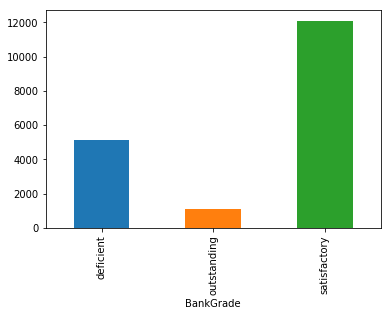

In [435]:
disputedResolutions.groupby(disputedResolutions.BankGrade).size().plot(kind='bar')

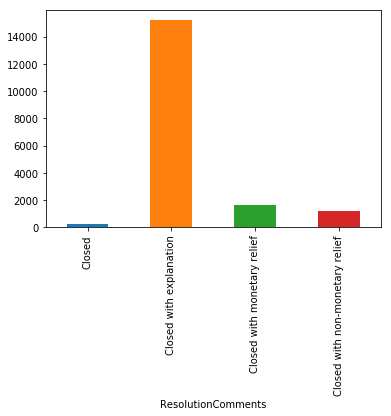

In [436]:
disputedResolutions.groupby(disputedResolutions.ResolutionComments).size().plot(kind='bar')

In [437]:
prunedData = disputedResolutions

#### There are many other things TBD to prune the data.. Few rows at a time

#### Summary: We can further prune the data with different  querries so that we are left with pure gold mine of useful Disreputable Grievences!! This was just an attempt to show the possibilities

## Part D Text mining on disputed subset

#### Lets Start text analytics on  GrievanceDescription 

In [438]:
prunedData.shape

(18305, 14)

In [439]:
prunedData.columns

Index(['GrievanceID', 'BankID', 'State', 'DateOfGrievance',
       'Grievance_Category', 'GrievanceDescription', 'LineOfBusiness',
       'ResolutionComments', 'Disputed', 'DateOfResolution', 'ResolutionTime',
       'weekday', 'BankGrade', 'year'],
      dtype='object')

###  D.1 preprocess the text
- lowercae convert
- remove puntuation, stopwords, digits 

In [54]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [55]:
np.random.seed(9991)
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    text = bytes("Error {0}".format(str(text)), encoding='utf-8')
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [56]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
#print(len(stop))


import time

t0 = time.time()
prunedData['cleanDescription'] = prunedData.GrievanceDescription.str.lower()
t1 = time.time()
print(t1-t0, " seconds")

t0 = time.time()
prunedData['cleanDescription'] = prunedData.cleanDescription.str.replace(r'[0-9x;\.:,W+]+', '')

t1 = time.time()
print(t1-t0, " seconds")

t0 = time.time()
prunedData['cleanDescription'] = prunedData['cleanDescription'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
t1 = time.time()
print(t1-t0, " seconds")

prunedData.cleanDescription

NameError: name 'prunedData' is not defined

In [443]:
regulatoryWords = ['law', 'attorney', 'court', 'jurisdiction', 'enforcement']
nagativeWords = ['cheat', 'false', 'excessive', 'unfair', 'unlawful', 'wrong']



In [444]:
prunedData

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution,ResolutionTime,weekday,BankGrade,year,cleanDescription
8,GID348126,Bank5279,State43,2012-04-06,"Loan servicing, payments, escrow account",My wife and I have had a home mortgage throug...,Mortgage,Closed with explanation,No,2012-04-27,21,FRIDAY,outstanding,2012,wife home mortgage last years notified us mort...
11,GID349588,Bank5279,State9,2012-04-16,"Loan servicing, payments, escrow account",The servicing of my home mortgage was transfe...,Mortgage,Closed with explanation,Yes,2012-05-09,23,WEDNESDAY,outstanding,2012,servicing home mortgage transferred bank llc (...
13,GID350068,Bank5279,State26,2012-04-20,"Loan modification,collection,foreclosure","In XXXX 2015, I spoke to Bank5279 mortgage to...",Mortgage,Closed with explanation,Yes,2012-05-12,22,SATURDAY,outstanding,2012,spoke bank mortgage arrange get current mortga...
14,GID350082,Bank5279,State9,2012-04-20,"Loan servicing, payments, escrow account",My loan account was transferred to another mo...,Mortgage,Closed with explanation,Yes,2012-05-12,22,SATURDAY,outstanding,2012,loan account transferred another mortgage comp...
23,GID353284,Bank5279,State27,2012-05-11,"Loan servicing, payments, escrow account","During my mortgage transfer, the gaining loan...",Mortgage,Closed with explanation,Yes,2012-06-02,22,SATURDAY,outstanding,2012,mortgage transfer gaining loan servicer poor c...
26,GID353626,Bank5279,State36,2012-05-13,"Loan servicing, payments, escrow account",My mortgage was sold from XXXX XXXX XXXX XXXX...,Mortgage,Closed with explanation,Yes,2012-06-04,22,MONDAY,outstanding,2012,mortgage sold bank llc informed control compan...
36,GID355048,Bank5279,State16,2012-05-21,Credit decision / Underwriting,I had been working with Bank5279 company sinc...,Mortgage,Closed with explanation,Yes,2012-06-12,22,TUESDAY,outstanding,2012,working bank company since mortgage loan pre-a...
40,GID356168,Bank5279,State22,2012-05-29,"Application, originator, mortgage broker",I applied for a refinance with cash out in XX...,Mortgage,Closed with explanation,No,2012-06-29,31,FRIDAY,outstanding,2012,applied refinance cash // rate locked loan und...
42,GID356608,Bank5279,State45,2012-06-02,"Loan servicing, payments, escrow account","XXXX, 2015, I submitted a mortgage payment in...",Mortgage,Closed with explanation,Yes,2012-06-24,22,SUNDAY,outstanding,2012,submitted mortgage payment full amount owed {$...
43,GID356772,Bank5279,State45,2012-06-02,"Loan servicing, payments, escrow account","XXXX, 2015, I submitted a mortgage payment in...",Mortgage,Closed with explanation,Yes,2012-06-24,22,SUNDAY,outstanding,2012,submitted mortgage payment full amount owed {$...


## A dictionary  approach
Looking at the diverse set of words and a few words which occur frequently in disupted issues,  We can come up with our dictionary and see if any of the words in our dictionary is seen in the grievence Description.
### Advantages:
Totally explainable model. It can be fine-tuned as well.

### Drawbacks:
Overfitting, due to lookup approach.
Does not scale well on unseen data. Periodic review is needed

### A middle ground:
- Weight column : Use this as another feature. Assign a weight (higher the weight for higher count of occurrances of dictionary words)
- Use other ML algorithms with weight added

### Following is an illustration

In [446]:
myDictionary = regulatoryWords + nagativeWords
myDictionary

['law',
 'attorney',
 'court',
 'jurisdiction',
 'enforcement',
 'cheat',
 'false',
 'excessive',
 'unfair',
 'unlawful',
 'wrong']

In [445]:
def findMatch(desc):
    mc=0
    for kw in myDictionary:
     if kw in desc:
            print("matches ", kw)
            return True
    print('no match found in ', desc)
    return False
findMatch('affdsfffw unfair')

sample = prunedData.head(10)
sample['Flagged'] = sample.cleanDescription.map(findMatch)

matches  unfair
no match found in  wife home mortgage last years notified us mortgage transferred bank believe less notice required ( n't days? ) bank contacted us transfer want know
matches  wrong
no match found in  spoke bank mortgage arrange get current mortgage bank representative agreed would make payments approimately {$} bank representative took first installment approimately {$} day made agreement phone two weeks later suffered unable work hospital limited physically time bank sent agreement writing able check much later discharged hospital able walk start leaving house driven family members errands checked mail got letter correspondence incorrectly documented agreement stating agreed make payments {$} simply occur agreement made representative phone believe note payment made approimately {$} {$} upset bank misrepresented agreement would like company review phone records call confirm agree pay payments {$} know could make payments beyond first {$} recovering would like bank epl

/Users/bsriram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [447]:
sample = prunedData.iloc[[2]]
txt = sample.cleanDescription.str
words = []
for word in txt.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(txt))

[['spoke', 'bank', 'mortgage', 'arrange', 'get', 'current', 'mortgage', 'bank', 'representative', 'agreed', 'would', 'make', 'payments', 'approimately', '{$}', 'bank', 'representative', 'took', 'first', 'installment', 'approimately', '{$}', 'day', 'made', 'agreement', 'phone', 'two', 'weeks', 'later', 'suffered', 'unable', 'work', 'hospital', 'limited', 'physically', 'time', 'bank', 'sent', 'agreement', 'writing', 'able', 'check', 'much', 'later', 'discharged', 'hospital', 'able', 'walk', 'start', 'leaving', 'house', 'driven', 'family', 'members', 'errands', 'checked', 'mail', 'got', 'letter', 'correspondence', 'incorrectly', 'documented', 'agreement', 'stating', 'agreed', 'make', 'payments', '{$}', 'simply', 'occur', 'agreement', 'made', 'representative', 'phone', 'believe', 'note', 'payment', 'made', 'approimately', '{$}', '{$}', 'upset', 'bank', 'misrepresented', 'agreement', 'would', 'like', 'company', 'review', 'phone', 'records', 'call', 'confirm', 'agree', 'pay', 'payments', '{$

In [448]:
n=200
t0 = time.time()
preprocessed = prunedData[0:n]
preprocessed.clean = preprocessed.cleanDescription.map(preprocess)
t1 = time.time()
print(t1-t0, " seconds for preprocessing")

0.7920618057250977  seconds for preprocessing


/Users/bsriram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [449]:
preprocessed.head(3)

,GrievanceID,BankID,State,DateOfGrievance,Grievance_Category,GrievanceDescription,LineOfBusiness,ResolutionComments,Disputed,DateOfResolution,ResolutionTime,weekday,BankGrade,year,cleanDescription
8,GID348126,Bank5279,State43,2012-04-06,"Loan servicing, payments, escrow account",My wife and I have had a home mortgage throug...,Mortgage,Closed with explanation,No,2012-04-27,21,FRIDAY,outstanding,2012,wife home mortgage last years notified us mort...
11,GID349588,Bank5279,State9,2012-04-16,"Loan servicing, payments, escrow account",The servicing of my home mortgage was transfe...,Mortgage,Closed with explanation,Yes,2012-05-09,23,WEDNESDAY,outstanding,2012,servicing home mortgage transferred bank llc (...
13,GID350068,Bank5279,State26,2012-04-20,"Loan modification,collection,foreclosure","In XXXX 2015, I spoke to Bank5279 mortgage to...",Mortgage,Closed with explanation,Yes,2012-05-12,22,SATURDAY,outstanding,2012,spoke bank mortgage arrange get current mortga...


## Summary of Exploration/Findings


### Results:
#### Feature Engineering was very useful : A few Features (Disputed, ResolutionTime, ResolutionComments) have a lot of predictive power and ability to cut down the chase

#### Preprocessed the GrievanceDescription Column

#### A Dictionary based approach In Text mining, a dictionary based approach was prototyped. The outcome of this approach will be to compute A new feature keyWordWt and build several ML models

#### Todos: 
- more visuals/plots needed
- Cleanup/comment the code
- Optimiza for time/space
- ML model

### Lessons:
- Direct application of ML is futile and not explainable.
- More Reasonable dives into Data to remove the noise


### A few details on EDA
### A Bank Grade depends on Compliances as specified in FTCA document
#### Grievance Description needs to be analysed using Text analytics
#### Before we jump into the GrievanceDescription, we also need to look at other features which directly or indirectly impact Grievances and resulting grading

### The idea was to reduce/prune the data-set to achieve condensed set of GrievenceRecords before proceeding to text mining
#### In Text mining, A dictionary based model was prototyped (not tested)

### Most of the work was on looking at other features which can potentially impact GrievenceDescription and BankGrade

Why work on other features?
It is an easier approach to Cut down the noise and then focus on real stuff (text mining) . Have a limited (corroborated ) set of data to get the rest 20% of predictability
We can see there are good indicators present in the other columns

Based on Data Analysis 
We can classify the features into 2 Classes:
1. Features having Direct impact on Grievences and Grade
  a. Disputed
  b. ResolutionComments
  c. Grievance_Category (a  
2. Features indirectly impacting the Grievences/Grade
 a. LineOfBusiness

Some inferences drawn:

Dependency hierarchy of BankGrade/GrievenceDescription (Y) on Features (X's)

 LineOfBusiness -->
     Disputed           -->
     ResolutionComments -->|
     Grievence_Category --> GrievanceDescription  -> BankGrade 
